In [ ]:
pip install ipython-autotime

In [ ]:
pip install bing-image-downloader

In [ ]:
mkdir images

In [ ]:
from bing_image_downloader import downloader
Plts = ["Mercury","Venus","Earth","Mars","Jupiter","Saturn","Uranus","Neptune"]
for plts in Plts:
  downloader.download(f"planet {plts} isro NASA photos",limit=50, output_dir="images")

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
target=[]
images=[]
flat_d=[]

DATASETS='/content/images'
CATEGORIES=os.listdir("images")
print(CATEGORIES)
CATEGORIES=['planet Saturn isro NASA photos', 'planet Mars isro NASA photos', 'planet Uranus isro NASA photos', 'planet Venus isro NASA photos', 'planet Jupiter isro NASA photos', '.ipynb_checkpoints', 'planet Earth isro NASA photos', 'planet Neptune isro NASA photos', 'planet Mercury isro NASA photos']

['planet Saturn isro NASA photos', 'planet Mars isro NASA photos', 'planet Uranus isro NASA photos', 'planet Venus isro NASA photos', 'planet Jupiter isro NASA photos', 'planet Earth isro NASA photos', 'planet Neptune isro NASA photos', 'planet Mercury isro NASA photos']


In [ ]:
for cat in CATEGORIES:
  cln=CATEGORIES.index(cat)
  p=DATASETS+'/'+cat
  print(p)
  if p=='/content/images/.ipynb_checkpoints':
    continue
  for img in os.listdir(p):
    iarray=imread(p+'/'+img)
    irz=resize(iarray,(150,150,3))
    flat_d.append(irz.flatten())
    images.append(irz)
    target.append(cln)

flat_d=np.array(flat_d)
images=np.array(images)
target=np.array(target)

xtrain,xtest,ytrain,ytest=train_test_split(flat_d,target,test_size=0.2, random_state=196)

/content/images/planet Saturn isro NASA photos
/content/images/planet Mars isro NASA photos
/content/images/planet Uranus isro NASA photos
/content/images/planet Venus isro NASA photos
/content/images/planet Jupiter isro NASA photos
/content/images/.ipynb_checkpoints
/content/images/planet Earth isro NASA photos
/content/images/planet Neptune isro NASA photos
/content/images/planet Mercury isro NASA photos


In [ ]:
model = SVC(kernel='linear')

model.fit(xtrain, ytrain)

predictions = model.predict(xtest)

accuracy = accuracy_score(ytest, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8888888888888888


(2233, 4613, 3)
Planet  Saturn


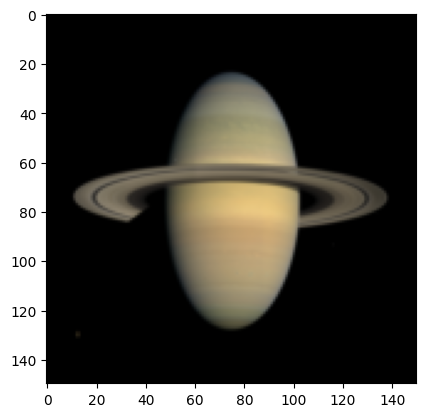

In [ ]:
nf_dat=[]
imag=imread("https://upload.wikimedia.org/wikipedia/commons/c/c7/Saturn_during_Equinox.jpg")
im_rz=resize(imag,(150,150,3))
nf_dat.append(im_rz.flatten())
nf_dat=np.array(nf_dat)
print(imag.shape)
plt.imshow(im_rz)
out=model.predict(nf_dat)
out=CATEGORIES[out[0]].split()
out=out[1]
print("Planet ",out)